## Content-Based Recommender System

This notebook contains the implementation of 'movie_lens' dataset, where we are developing a simple Content-Based Recommender System.

**Two most common types of recommender systems are Content-Based and Collaborative Filtering (CF).**
- Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

The recommendations will be given by suggesting movies that are most similar to a particular movie by finding the correlation between the two movies.


**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Getting the data**
- Rating dataset
- Movie title
- Item dataset

In [2]:
column = ['user_id', 'item_id','rating','timestamp']
df = pd.read_csv('u.data.csv', sep = '\t', names = column)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movies = pd.read_csv('Movie_Id_Titles.csv')
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df1 = pd.read_csv('u.item.csv',sep='|',  encoding='latin-1')

In [5]:
df1.head()

,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0.1,0.2,1.1,1.2,...,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Merging the dataset(Rating and movie titles**

In [6]:
df = pd.merge(df,movies, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

In [7]:
df.shape

(100003, 5)

In [8]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

There is no null values in the dataset

In [9]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: ',n_users)
print('Num of Movies: ',n_items)

Num. of Users:  944
Num of Movies:  1682


In [10]:
#grouping the title with its mean rating and sorting the values in descending order
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [11]:
#grouping the title with the count of rating and sorting the values in descending order
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

**Creating a ratings dataframe with average rating and number of ratings**

In [12]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['num_of_rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [14]:
ratings['num_of_rating'].value_counts().sort_values(ascending = False).head(10)

1     134
2      67
4      63
3      58
5      51
7      46
6      38
9      35
10     33
8      28
Name: num_of_rating, dtype: int64

**Creating  a histogram of number of ratings**

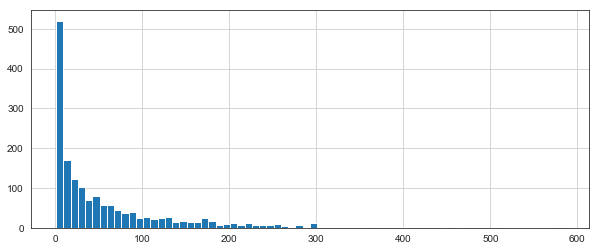

In [15]:
plt.figure(figsize=(10,4))
ratings['num_of_rating'].hist(bins = 70)

We can see that most of the movies have received less than 50 ratings. While the number of movies having more than 100 ratings is very low.

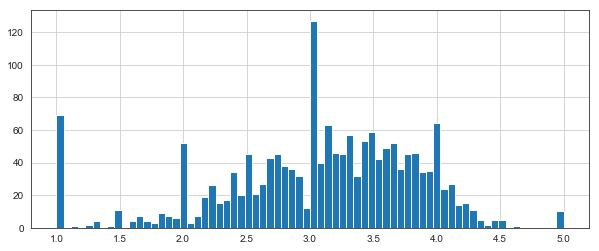

In [16]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins = 70)

We can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.

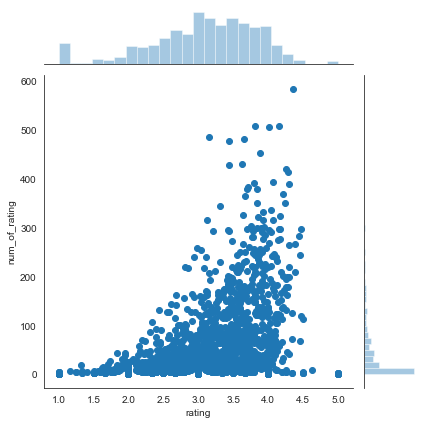

In [18]:
sns.jointplot(x = 'rating', y = 'num_of_rating', data = ratings)

The above graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

## Content - Based

Creating a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie.

In [19]:
movie_piv = df.pivot_table(index='user_id',columns='title',values='rating')
movie_piv.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of NaN values, because most people have not seen most of the movies.

In [20]:
ratings.sort_values('num_of_rating',ascending=False).head()

,rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


We will now find all the user ratings for the movie "Star Wars (1977)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

In [21]:
starwar_rating = movie_piv['Star Wars (1977)']
starwar_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [23]:
starwar_similar = movie_piv.corrwith(starwar_rating)

In [24]:
corr_starwar = pd.DataFrame(starwar_similar, columns = ['Correlation'])
corr_starwar.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [25]:
corr_starwar.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


From the output we can see that the movies that are highly correlated are not known to us this is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).
Therefore we will retrieve only those correlated movies that have been rated by more than 100 users.
To do this we will add the 'num_of_rating' column to the 'corr_starwar' df.

In [26]:
corr_starwar = corr_starwar.join(ratings['num_of_rating'])
corr_starwar.head()

,Correlation,num_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [27]:
corr_starwar[corr_starwar['num_of_rating']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Hence we can see that the highest correlated movie is the starwars itself and then the other 2 highly correlated movies are of sequel of the starwars movies, which highly makes sense.

In [28]:
#defing a function to find similar movies
def similar_movies(mov):
    rating = movie_piv[mov]
    similar = movie_piv.corrwith(rating)
    cor = pd.DataFrame(similar, columns = ['Correlation'])
    cor = cor.join(ratings['num_of_rating'])
    return cor[cor['num_of_rating']>100].sort_values('Correlation',ascending = False).head()

In [29]:
similar_movies('Liar Liar (1997)')

,Correlation,num_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


This is how we can similar movies for a particular movie.